# Understand the problem

**House Prices - Advanced Regression Techniques**

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

[Kaggle page](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview)

# Setup

In [29]:
import os
# Where to save the figures
CURRENT_DIR = ".." 
#The dot . is the current directory; 
# .. refers to one directory further up in the hierarchy
data2_PATH = os.path.join(CURRENT_DIR, "data3")
os.makedirs(data2_PATH, exist_ok=True)

In [30]:
import os
# Where to save the figures
CURRENT_DIR = "." 
#The dot . is the current directory; 
# .. refers to one directory further up in the hierarchy
IMAGES_PATH = os.path.join(CURRENT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
import sklearn
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline
# To plot pretty figures
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import pandas as pd

# EDA

### Get an overall view of the data

In [31]:
#read data
df_train = pd.read_csv('./data/train.csv')

In [32]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [33]:
#drop column ID:
df_train = df_train.drop(columns = ['Id'])

In [34]:
#check columns
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [36]:
df_train.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [37]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Check missing data and drop columns with high missing rate

In [38]:
#check missing data
def missing_values_table(df):
        #1 Total missing values
        mis_val = df.isnull().sum()
        
        #2 Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        #3 Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        #4 Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        #5 Only keep the columns with missing values
        mis_val_table_only = mis_val_table_ren_columns.loc[mis_val_table_ren_columns['% of Total Values'] > 0]
        
        #6 Return the dataframe with missing information
        return mis_val_table_only

In [39]:
missing_values_table(df_train)

,Missing Values,% of Total Values
LotFrontage,259,17.739726
Alley,1369,93.767123
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
BsmtQual,37,2.534247
BsmtCond,37,2.534247
BsmtExposure,38,2.602740
BsmtFinType1,37,2.534247
BsmtFinType2,38,2.602740
Electrical,1,0.068493


*Practice:*
Let's break down this function into small pieces and run each step
one by one to better understand it

In [40]:
#step one: Total missing values
mis_val = df_train.isnull().sum()
mis_val

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [41]:
#step two: Percentage of missing values
mis_val_percent = 100 * df_train.isnull().sum() / len(df_train)
mis_val_percent

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 80, dtype: float64

In [42]:
#step three: Make a table with the results
     #pd.concat - Concatenate pandas objects along a particular axis (1 is by column)
mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
mis_val_table

,0,1
MSSubClass,0,0.000000
MSZoning,0,0.000000
LotFrontage,259,17.739726
LotArea,0,0.000000
Street,0,0.000000
...,...,...
MoSold,0,0.000000
YrSold,0,0.000000
SaleType,0,0.000000
SaleCondition,0,0.000000


In [43]:
#Step four: Rename the columns
mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
mis_val_table_ren_columns

,Missing Values,% of Total Values
MSSubClass,0,0.000000
MSZoning,0,0.000000
LotFrontage,259,17.739726
LotArea,0,0.000000
Street,0,0.000000
...,...,...
MoSold,0,0.000000
YrSold,0,0.000000
SaleType,0,0.000000
SaleCondition,0,0.000000


In [44]:
#Step Five: Only keep the columns with missing rate > 0
mis_val_table_only =mis_val_table_ren_columns.loc[mis_val_table_ren_columns['% of Total Values'] > 0]
mis_val_table_only

,Missing Values,% of Total Values
LotFrontage,259,17.739726
Alley,1369,93.767123
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
BsmtQual,37,2.534247
BsmtCond,37,2.534247
BsmtExposure,38,2.602740
BsmtFinType1,37,2.534247
BsmtFinType2,38,2.602740
Electrical,1,0.068493


In [45]:
#Step Six: Apply the function to our dataframe:
missing=missing_values_table(df_train)
missing

,Missing Values,% of Total Values
LotFrontage,259,17.739726
Alley,1369,93.767123
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
BsmtQual,37,2.534247
BsmtCond,37,2.534247
BsmtExposure,38,2.602740
BsmtFinType1,37,2.534247
BsmtFinType2,38,2.602740
Electrical,1,0.068493


Usually there are three options to deal with missing values:
 1. Imputation
 2. Create missing flag
 3. Drop columns with a high percentage of missing vlaues

We see there are a number of columns with a high percentage of missing values. 
There is no well-established threshold for removing missing values, 

and the best course of action depends on the problem. 

Here, to reduce the number of features, we will remove any columns that have greater than 30% missing rate (in real situations, the threshold can be 90%).

In [46]:
## find columns with missing > 30%
missing_columns = list(missing.index[missing['% of Total Values'] > 30])
missing_columns

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [47]:
# drop these columns
df_train = df_train.drop(columns = missing_columns)

In [734]:
# reapply this missing function
re_missing=missing_values_table(df_train)

In [735]:
re_missing.sort_values(by='% of Total Values', ascending=False)

,Missing Values,% of Total Values
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945
GarageCond,81,5.547945
BsmtExposure,38,2.602740
BsmtFinType2,38,2.602740
BsmtQual,37,2.534247
BsmtCond,37,2.534247


#### Understand the target variable - SalePrice

C:\Users\kangd\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


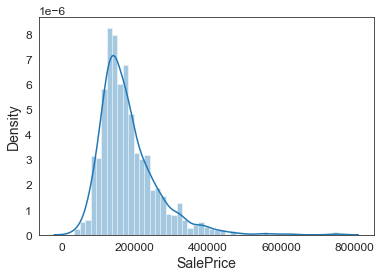

In [736]:
#histogram
sns.distplot(df_train['SalePrice']);

In [737]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [738]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


**Skewness** is a measure of asymmetry of a distribution.
    
- When the value of the skewness is negative, the tail of the distribution is longer towards the left hand side of the curve
    
- When the value of the skewness is positive, the tail of the distribution is longer towards the right hand side of the curve

*Important Notes*:

- If the skewness is between -0.5 and 0.5, the data are fairly symmetrical

- If the skewness is between -1 and -0.5 or between 0.5 and 1, the data are moderately skewed

- If the skewness is less than -1 or greater than 1, the data are highly skewed  


**Kurtosis** determine the volume of the outlier
- If the distribution is tall and thin it is called a leptokurtic distribution(Kurtosis > 3)  
- A flat distribution where the values are moderately spread out (i.e., unlike leptokurtic) is called platykurtic(Kurtosis <3) distribution
- A distribution whose shape is in between a leptokurtic distribution and a platykurtic distribution is called a mesokurtic(Kurtosis=3) distribution. A mesokurtic distribution looks more close to a normal distribution



##### Relationship with numerical variables:

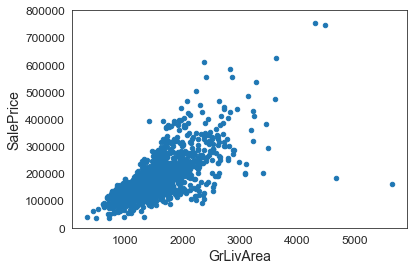

In [739]:
#scatter plot GrLivArea vs. SalePrice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

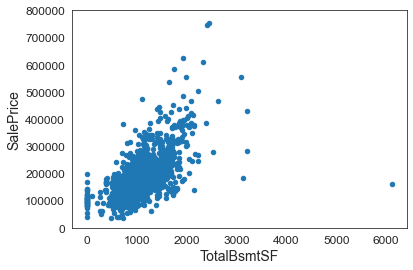

In [740]:
#scatter plot TotalBsmtSF vs. SalePrice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

##### Relationship with categorical variables:

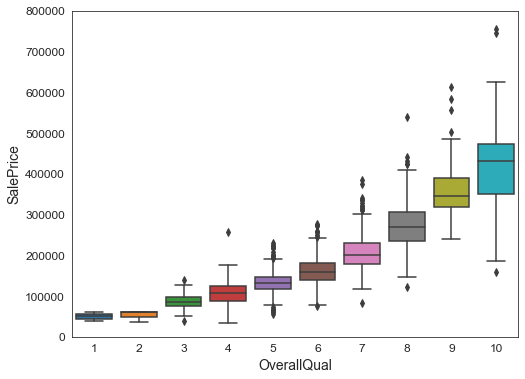

In [741]:
#box plot OverallQual vs. SalePrice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

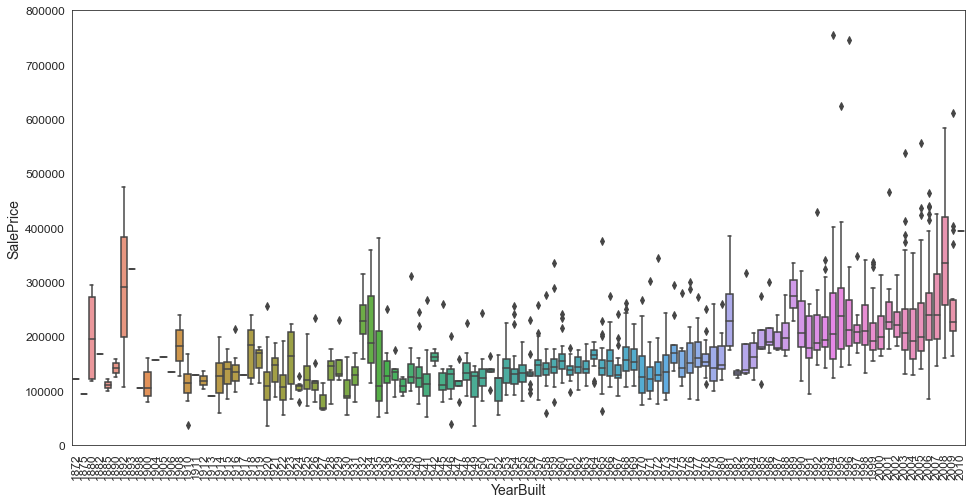

In [742]:
#box plot YearBuilt SalePrice
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

### Explore all the features and gain insights

- Numerical features

In [743]:
# Finding numeric features
list(set(df_train.dtypes.tolist()))  

[dtype('float64'), dtype('int64'), dtype('O')]

In [744]:
df_num = df_train.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


Saving figure num_histogram_plots


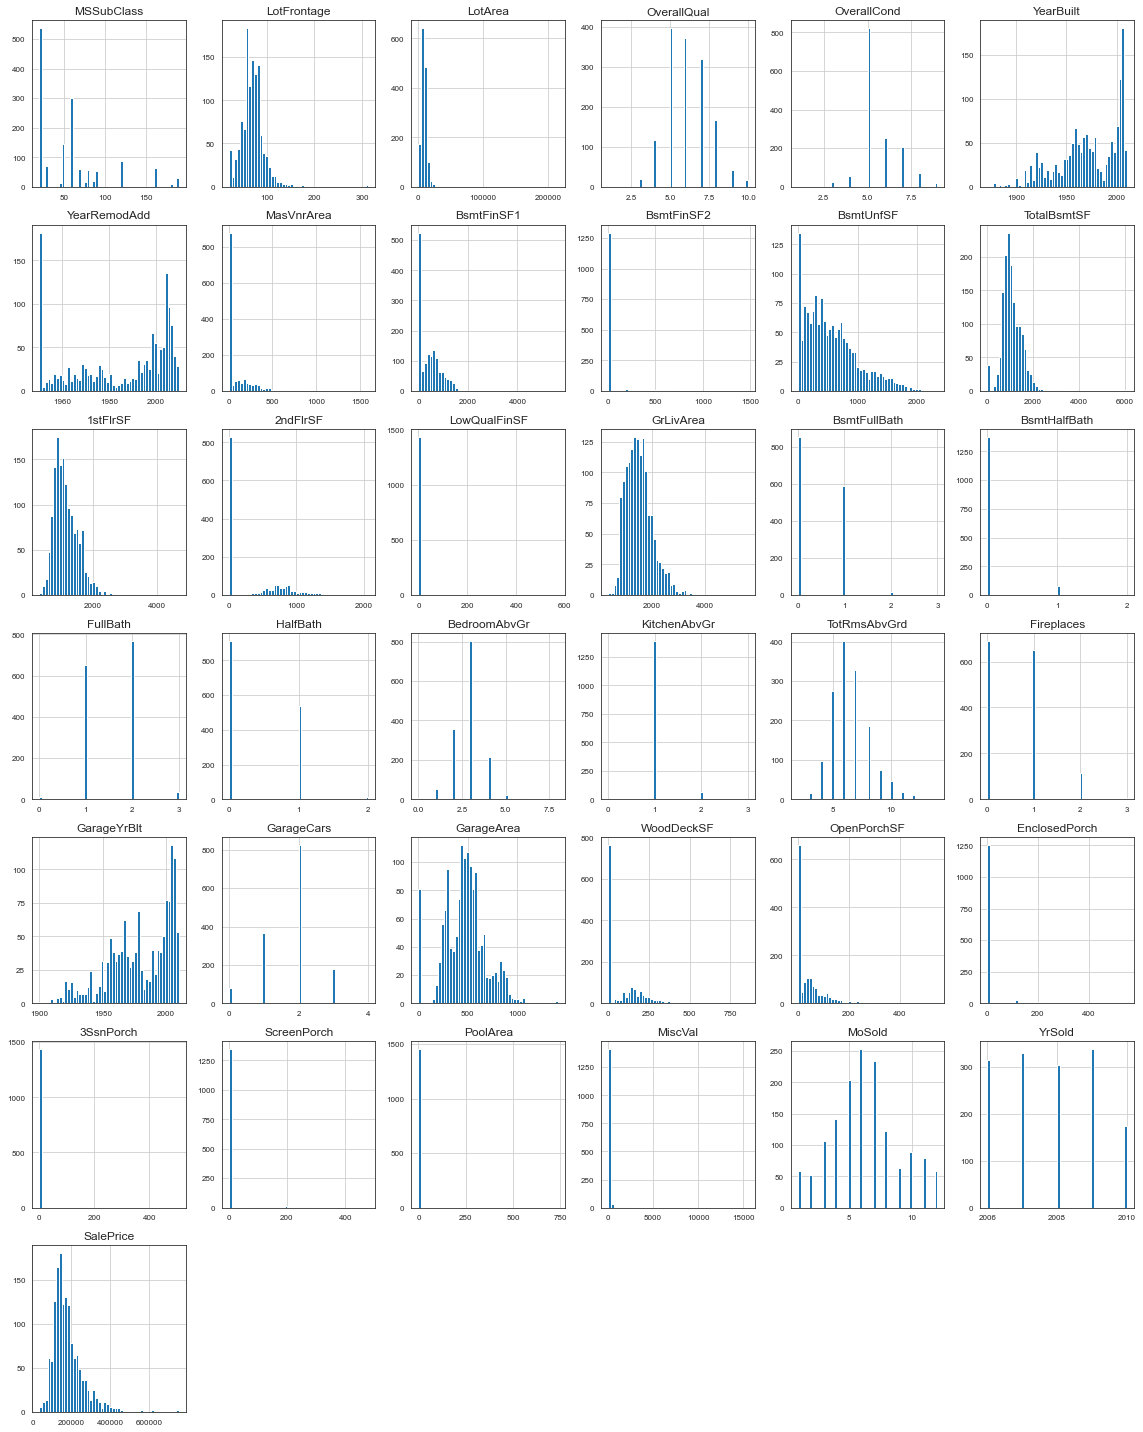

In [745]:
#plot all numerical features
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 
save_fig("num_histogram_plots")

Features such as `1stFlrSF`, `TotalBsmtSF`, `LotFrontage`, `GrLiveArea` have a similar distribution to `SalePrice`'s

In [746]:
abs(df_num.corr()['SalePrice'][:-1]) > 0.5

MSSubClass       False
LotFrontage      False
LotArea          False
OverallQual       True
OverallCond      False
YearBuilt         True
YearRemodAdd      True
MasVnrArea       False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF       True
1stFlrSF          True
2ndFlrSF         False
LowQualFinSF     False
GrLivArea         True
BsmtFullBath     False
BsmtHalfBath     False
FullBath          True
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd      True
Fireplaces       False
GarageYrBlt      False
GarageCars        True
GarageArea        True
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
Name: SalePrice, dtype: bool

In [747]:
#find which features are strongly correlated with SalePrice and store them into a variable - top_corr_features
df_num_corr = df_num.corr()['SalePrice'][:-1] # -1 because the latest row is SalePrice
top_corr_features = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(top_corr_features), top_corr_features))

There is 10 strongly correlated values with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


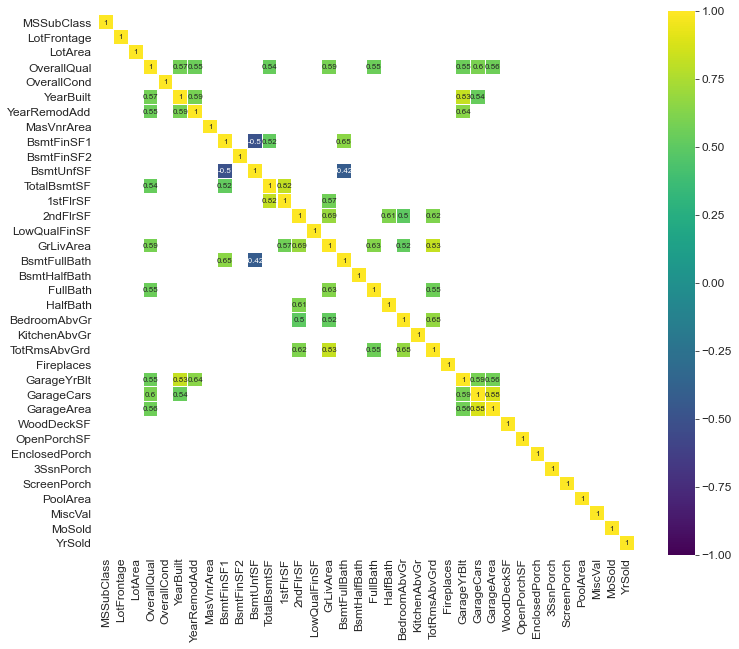

In [748]:
#use heatmap to see if some variables are linked between each other 
corr = df_num.drop('SalePrice', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

A lot of features seems to be correlated between each other but some of them such as YearBuild/GarageYrBlt may just indicate a price inflation over the years. As for 1stFlrSF/TotalBsmtSF, it is normal that the more the 1st floor is large (considering many houses have only 1 floor), the more the total basement will be large.

We can conclude that, by essence, some of those features may be combined between each other in order to reduce the number of features (`1stFlrSF`/`TotalBsmtSF`, `GarageCars`/`GarageArea`)

Some of the features of our dataset looks like numerical but are categorical. To separate the categorical from quantitative features lets refer ourselves to the data_description.txt file. According to this file we end up with the folowing columns:

In [749]:
quantitative_features_list = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
df_quantitative_values = df_num[quantitative_features_list]
df_quantitative_values.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,856,856,854,0,1710,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,1262,1262,0,0,1262,...,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,920,920,866,0,1786,...,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,756,961,756,0,1717,...,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,1145,1145,1053,0,2198,...,3,836,192,84,0,0,0,0,0,250000


Still, we have a lot of features to analyse here so let's take the strongly correlated quantitative features from this dataset and analyse them one by one

In [750]:
features_to_analyse = [x for x in quantitative_features_list if x in top_corr_features]
features_to_analyse.append('SalePrice')
features_to_analyse

['TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

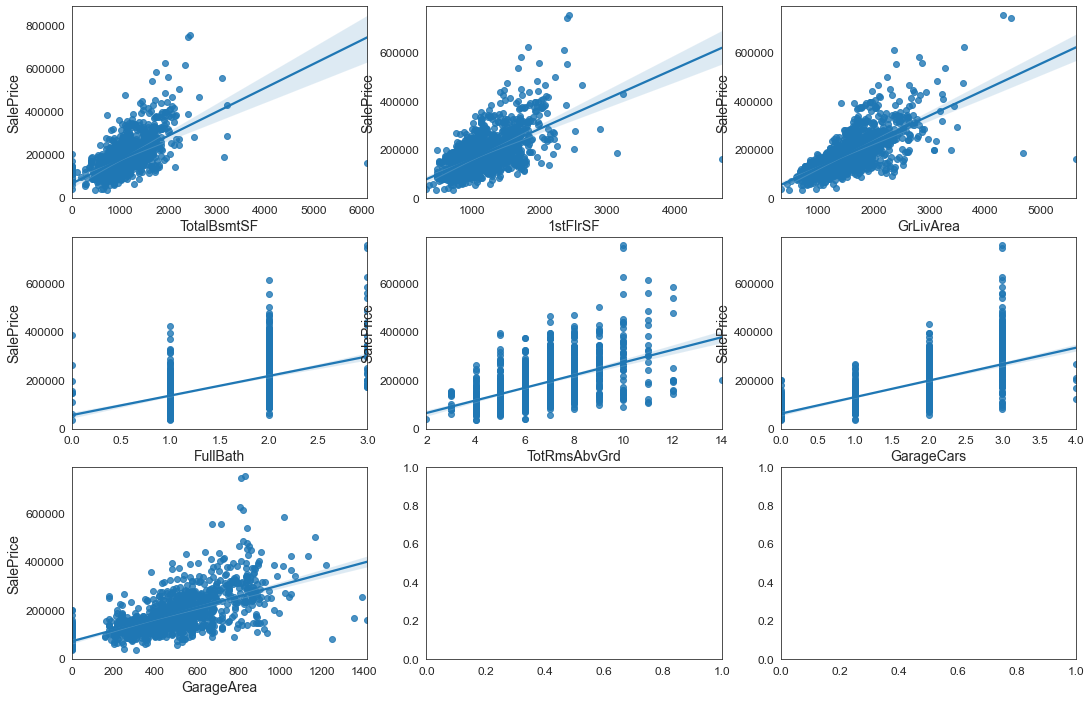

In [751]:
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='SalePrice', data=df_train[features_to_analyse], ax=ax)

- Categorical features

Lets get all the categorical features of our dataset and see if we can find some insight in them. Instead of opening back our data_description.txt file and checking which data are categorical, lets just remove quantitative_features_list from our entire dataframe

In [752]:
# quantitative_features_list[:-1] as the last column is SalePrice and we want to keep it
categorical_features = [a for a in quantitative_features_list[:-1] + df_train.columns.tolist() if a not in quantitative_features_list[:-1]]
df_categ = df_train[categorical_features]
df_categ.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2003.0,RFn,TA,TA,Y,2,2008,WD,Normal,208500
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,1976.0,RFn,TA,TA,Y,5,2007,WD,Normal,181500
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2001.0,RFn,TA,TA,Y,9,2008,WD,Normal,223500
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,1998.0,Unf,TA,TA,Y,2,2006,WD,Abnorml,140000
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,2000.0,RFn,TA,TA,Y,12,2008,WD,Normal,250000


we only care about non-numerical features now

In [753]:
df_not_num = df_categ.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n{}'.format(len(df_not_num.columns), 
                                                                 df_not_num.columns.tolist()))

There is 38 non numerical features including:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


<ipython-input-754-44f9464776ab>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
<ipython-input-754-44f9464776ab>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
<ipython-input-754-44f9464776ab>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
<ipython-input-754-44f9464776ab>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
<ipython-input-754-44f9464776ab>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
<ipython-input-754-44f9464776ab>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax

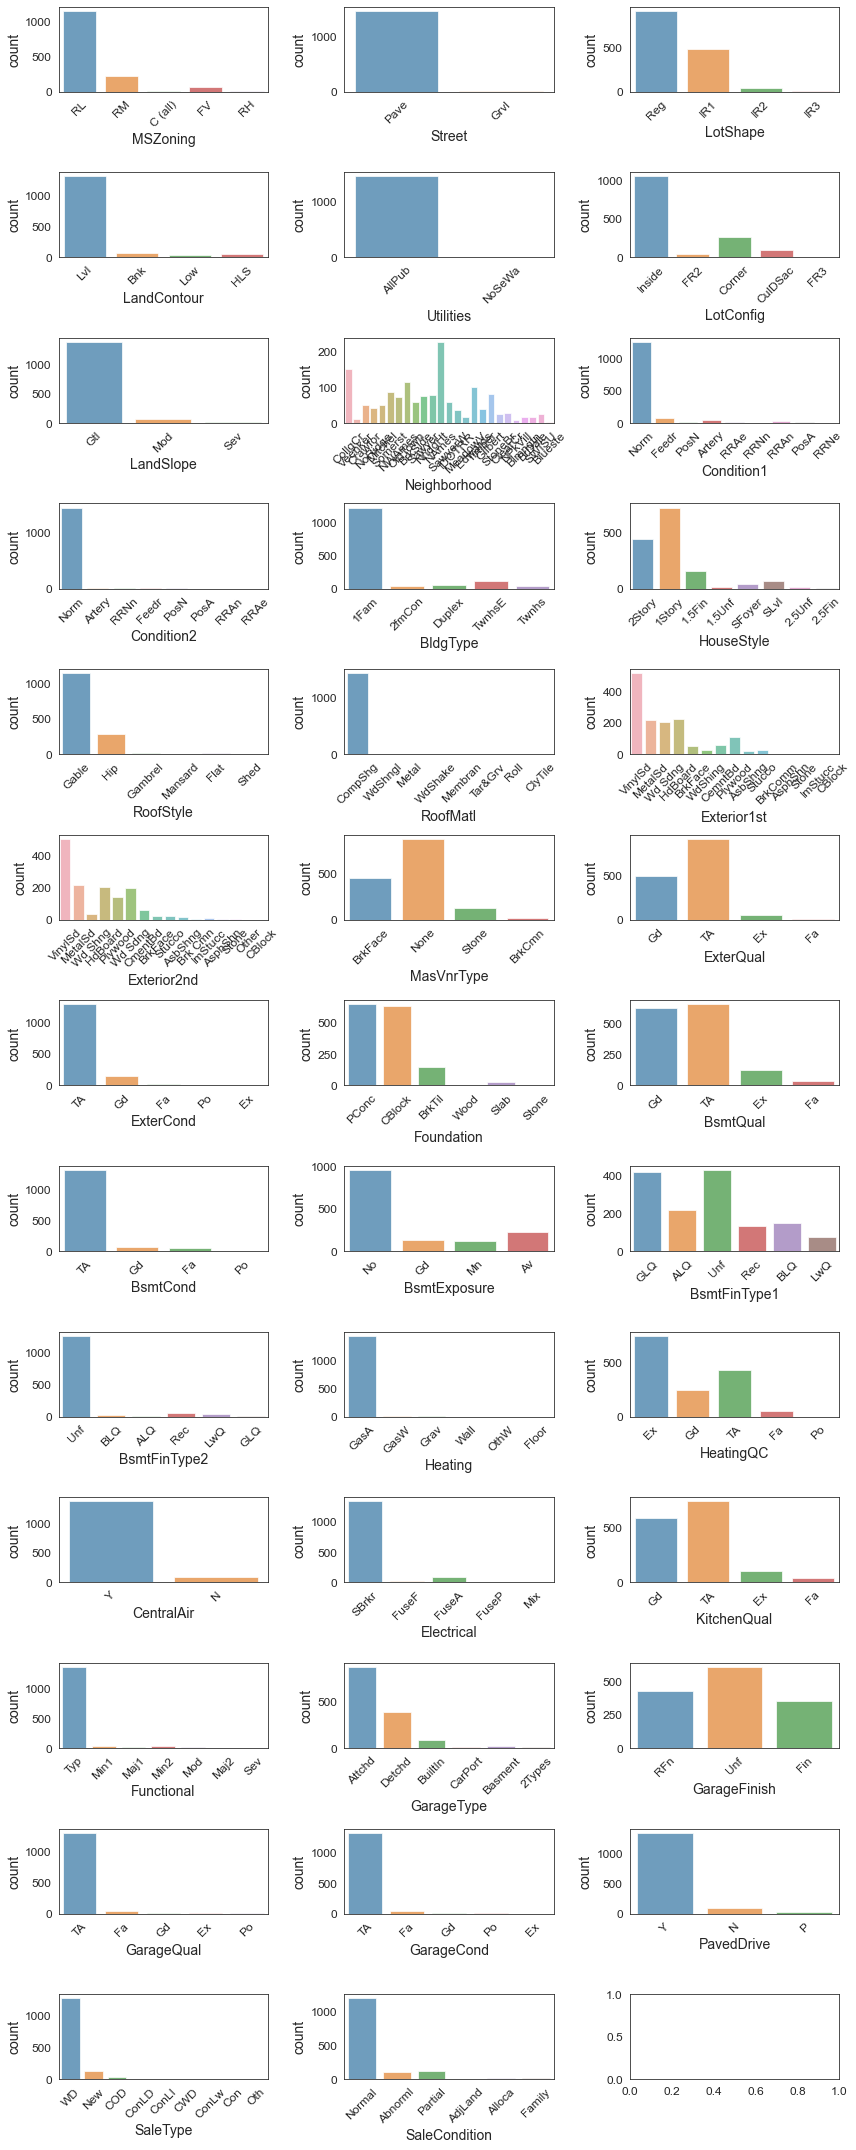

In [754]:
fig, axes = plt.subplots(round(len(df_not_num.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)

fig.tight_layout()

We can see that some categories are predominant for some features such as `Utilities`, `Heating`, `GarageCond`, `Functional`... These features may not be relevant for our predictive model

<ipython-input-755-37311ee9a23f>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, ax = plt.subplots(figsize=(16, 8))


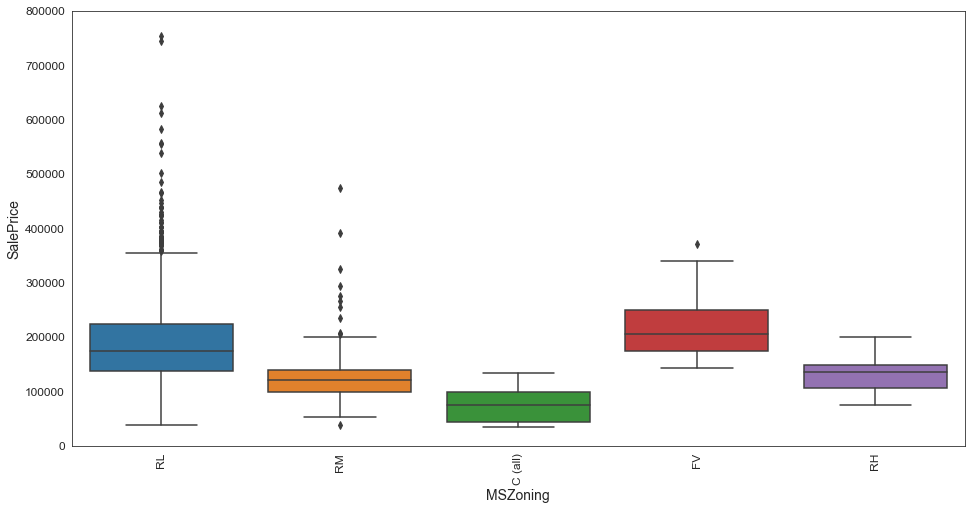

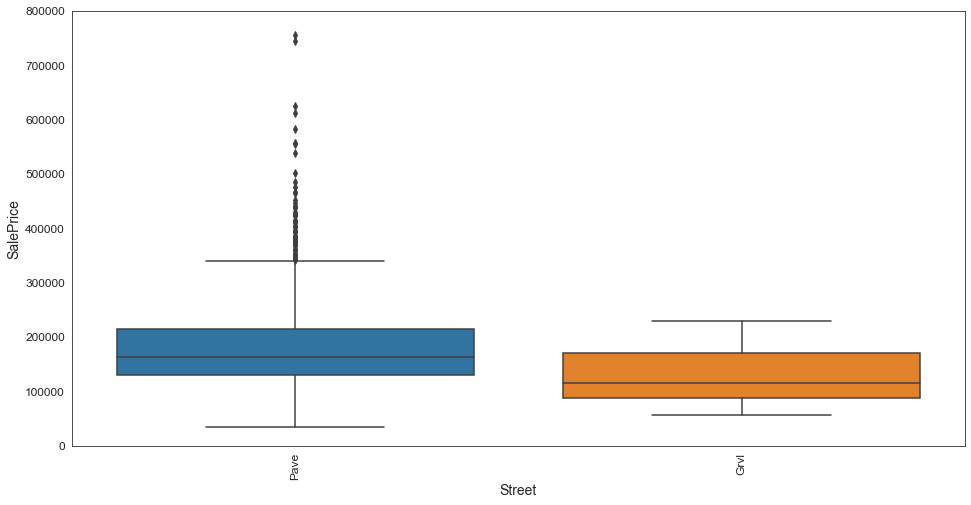

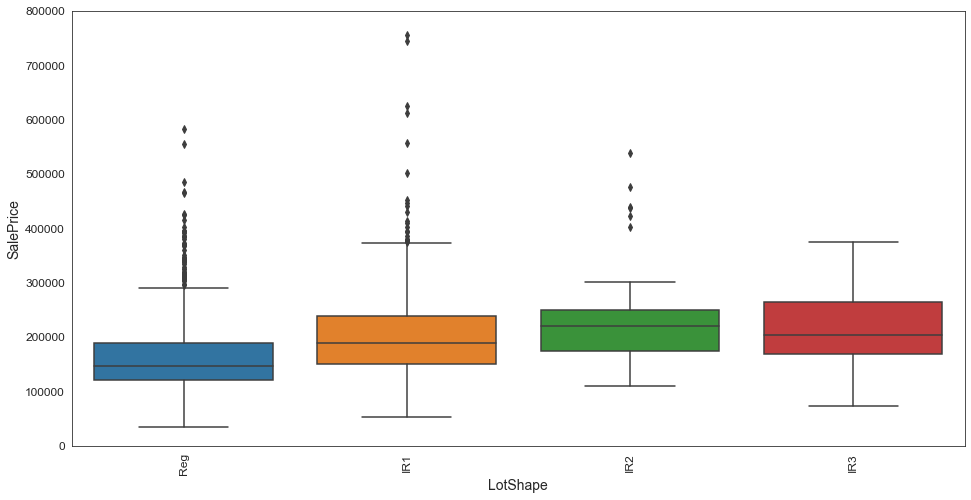

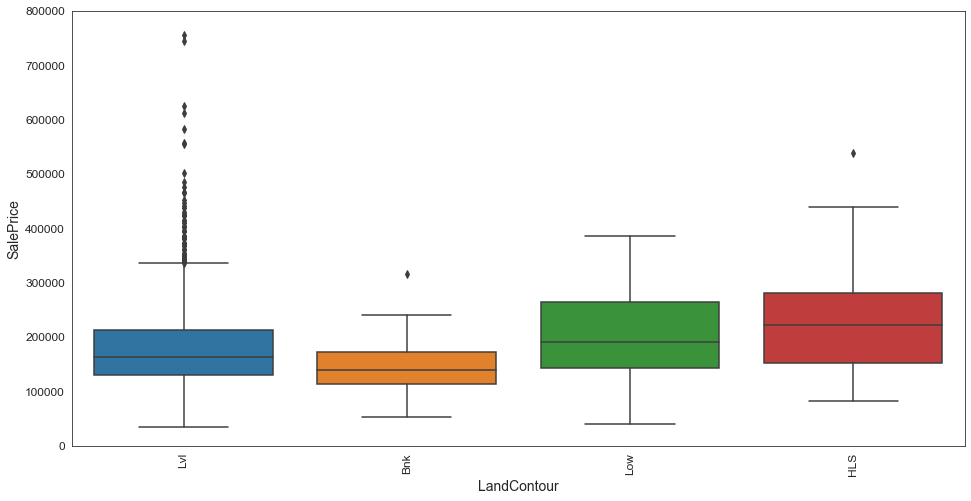

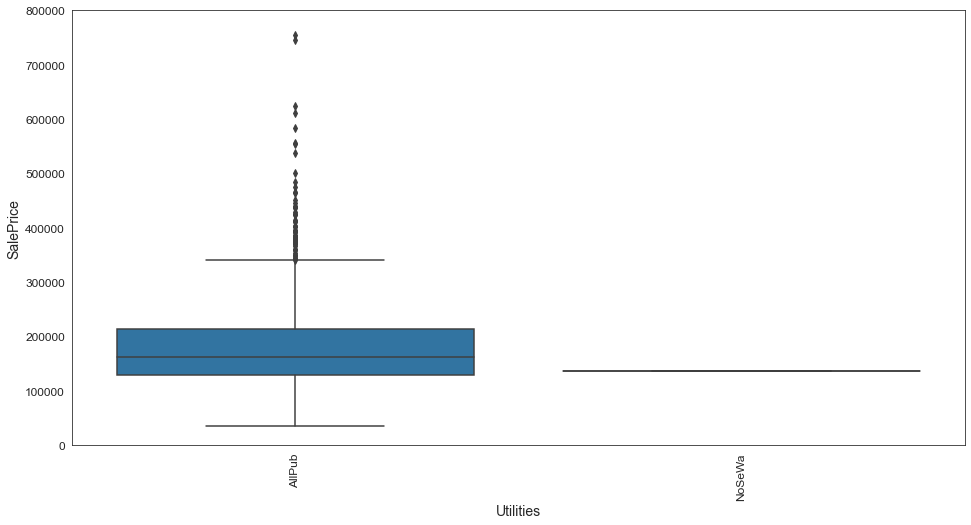

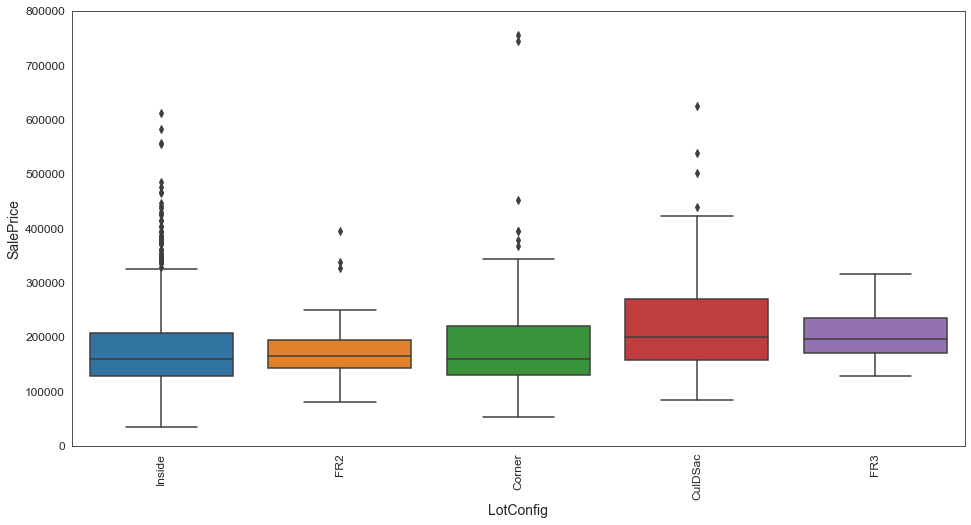

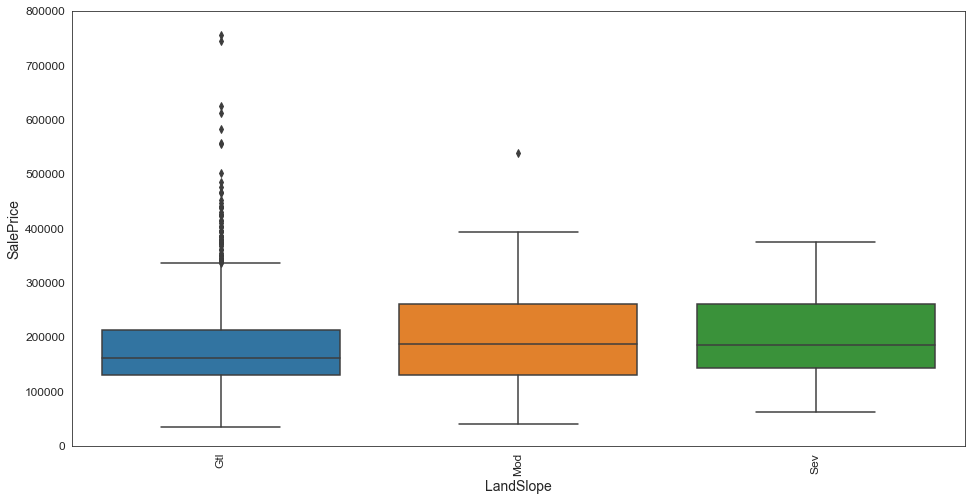

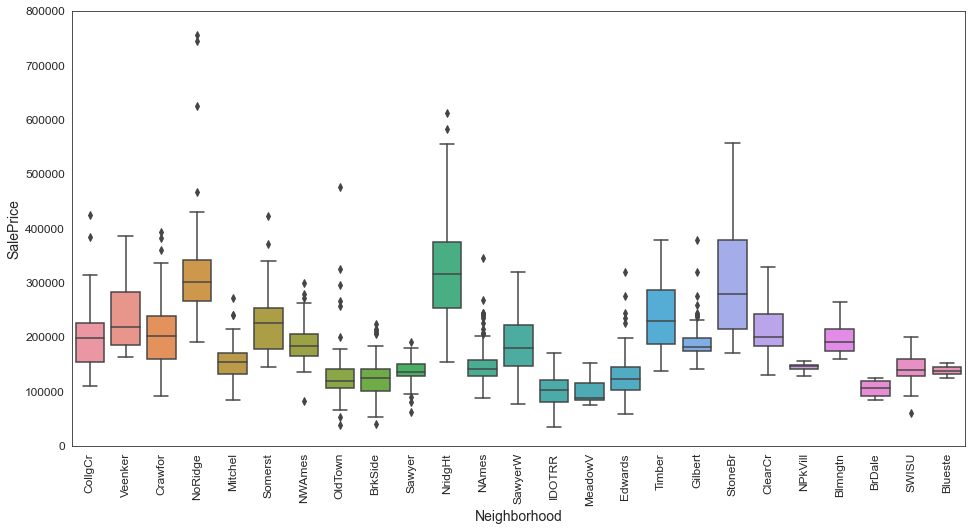

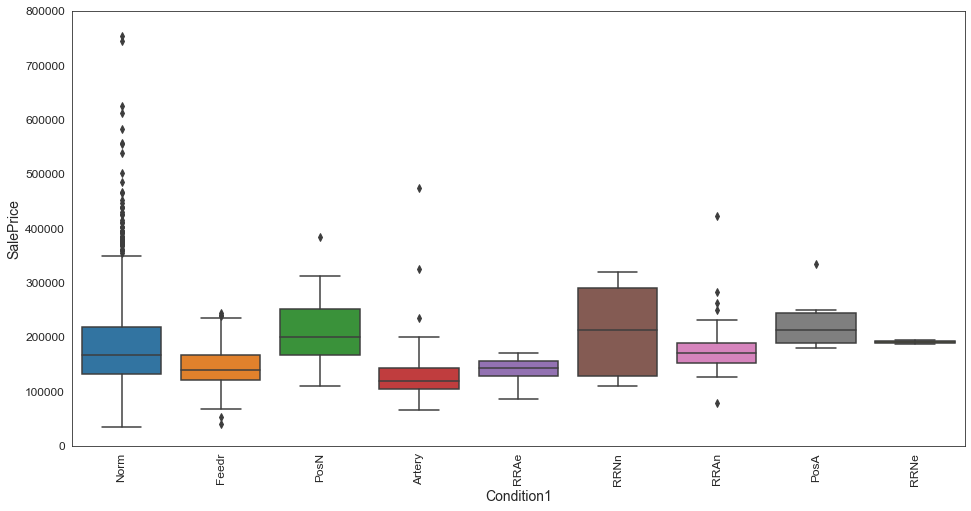

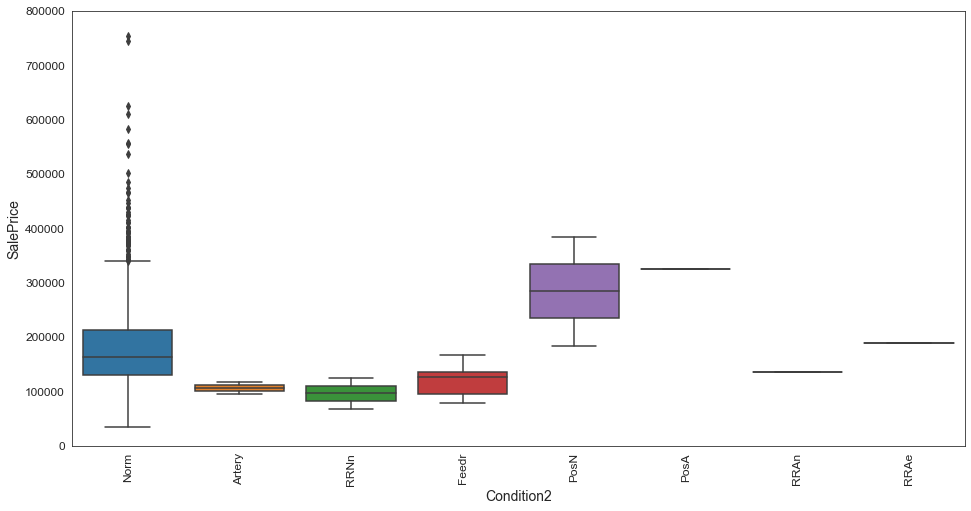

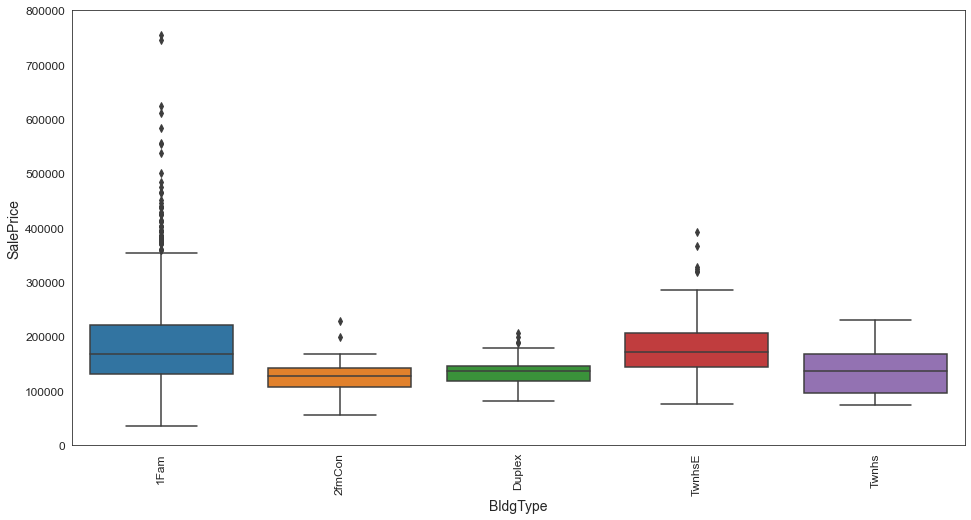

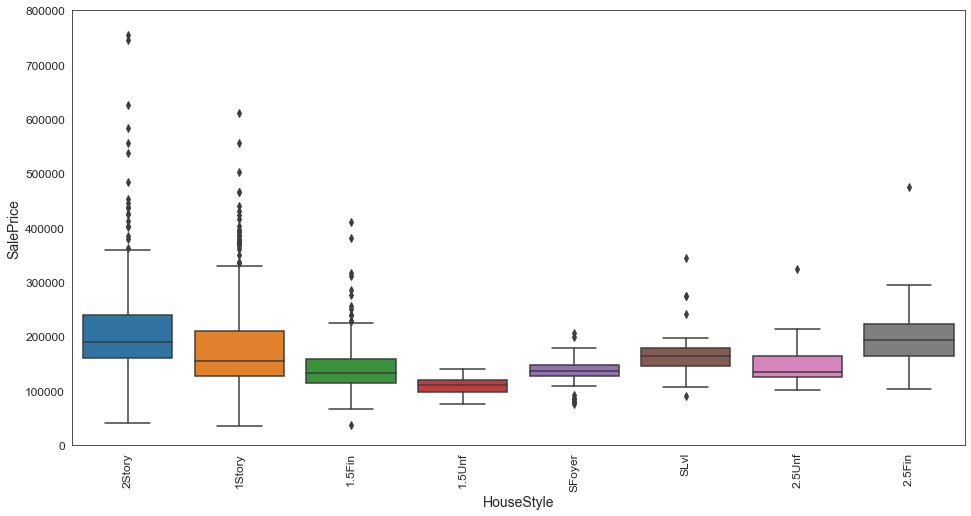

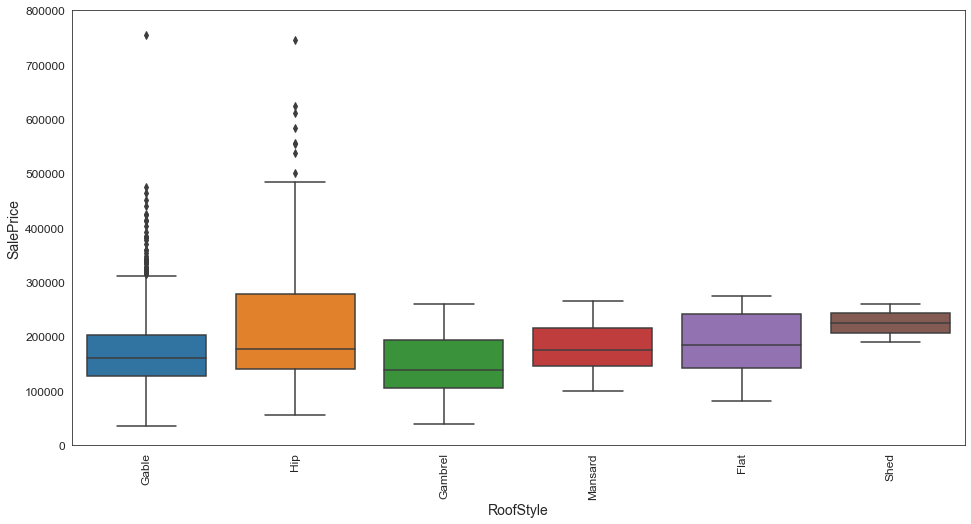

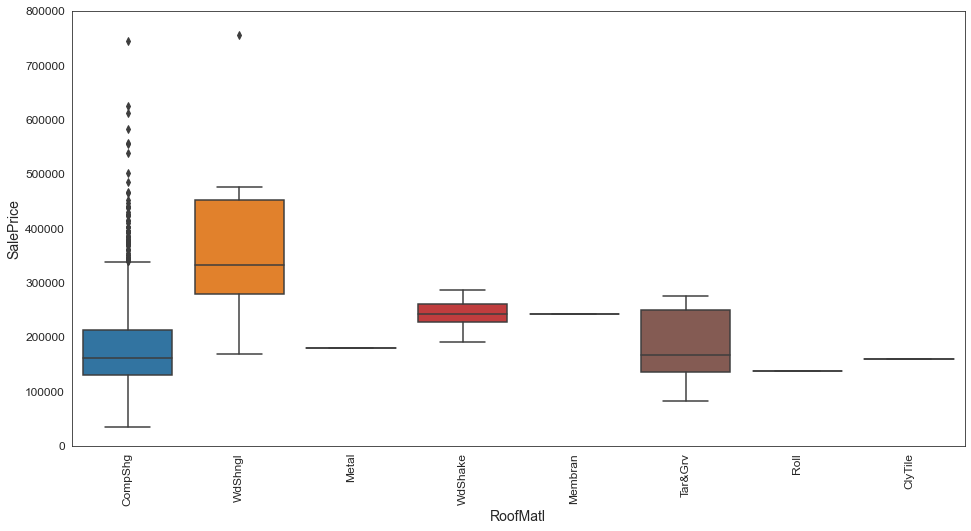

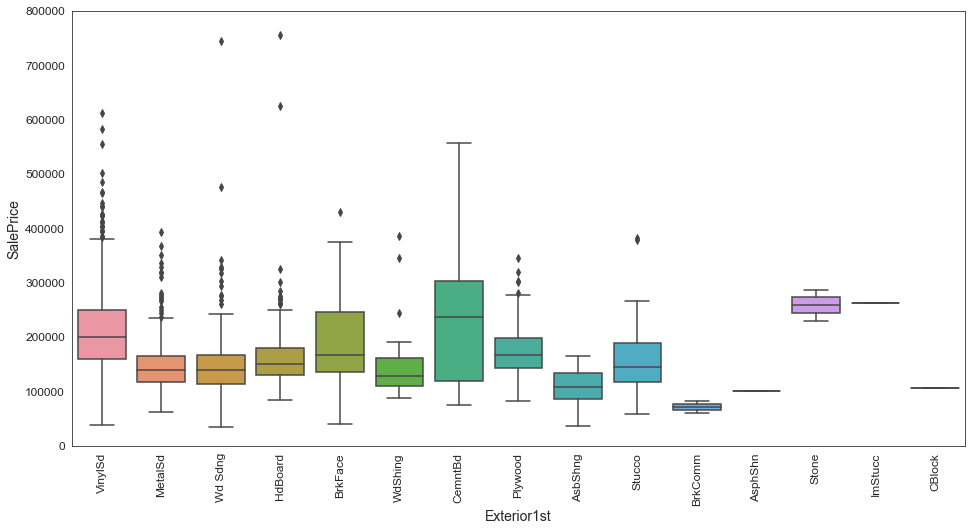

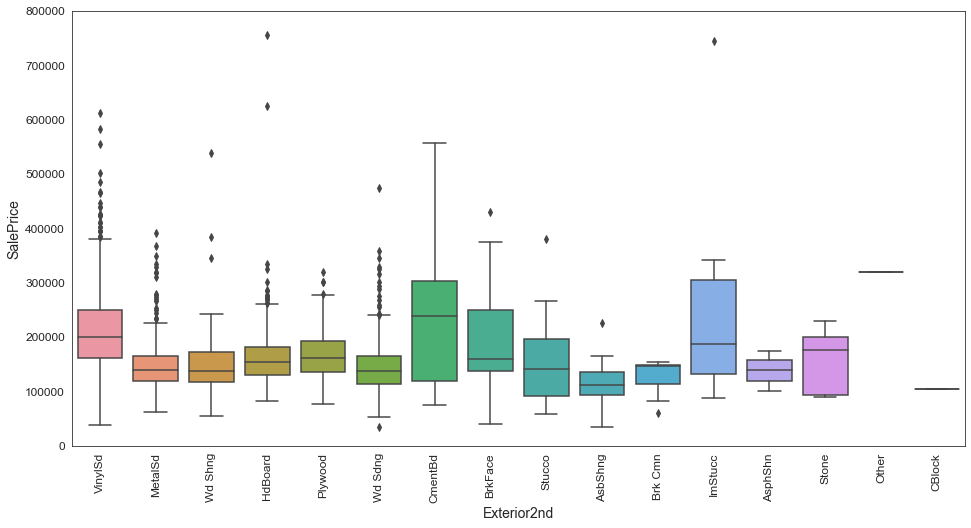

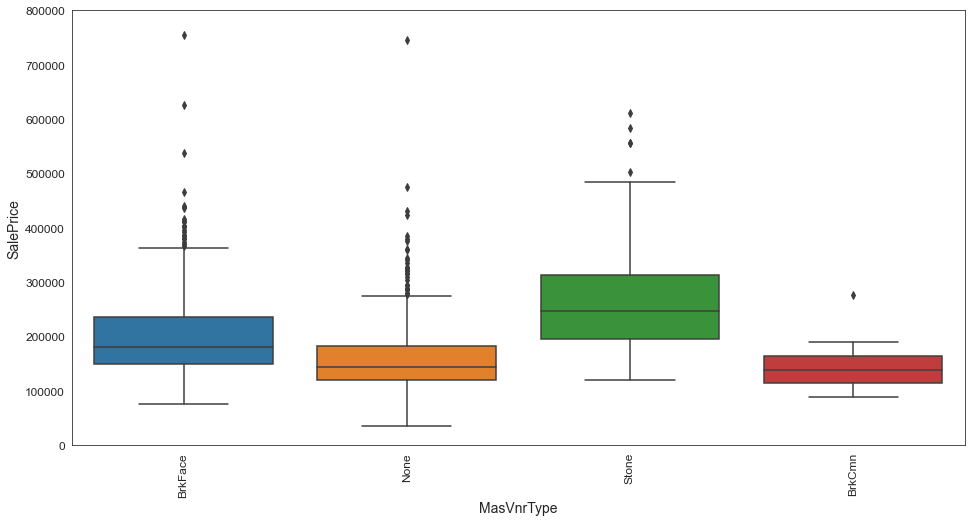

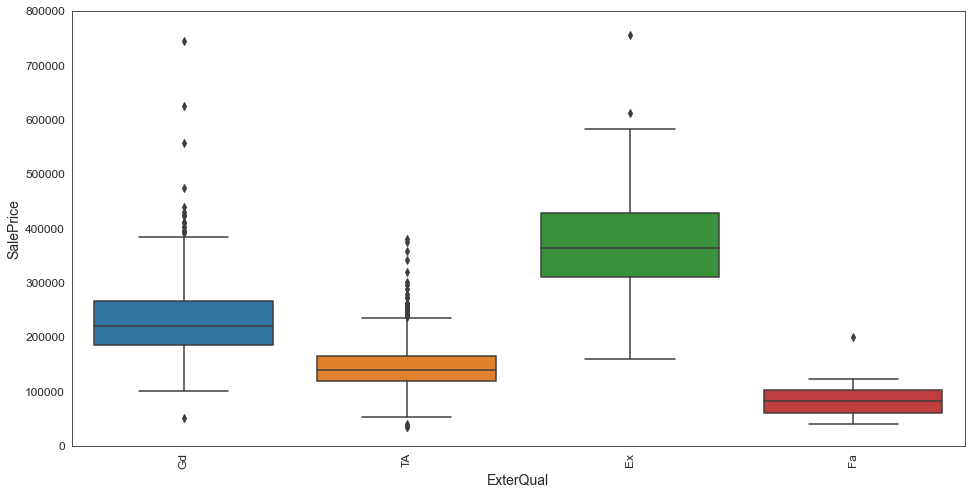

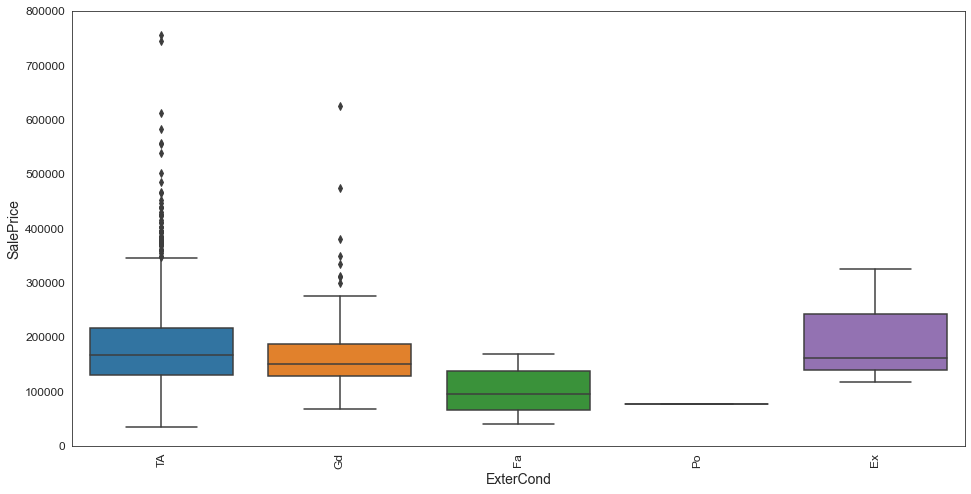

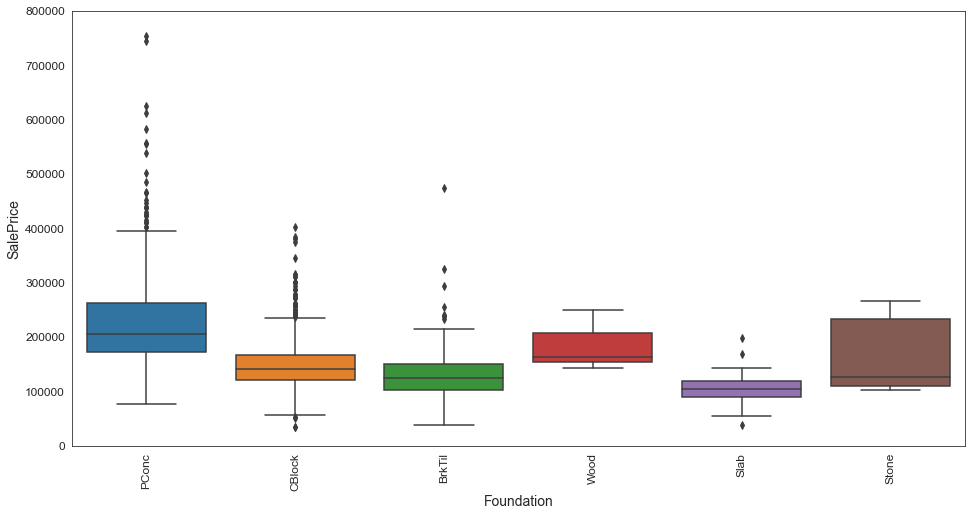

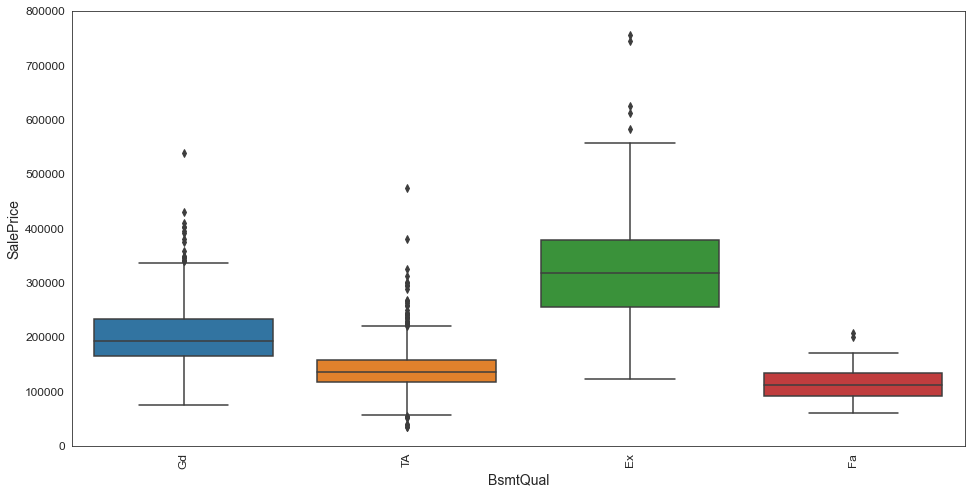

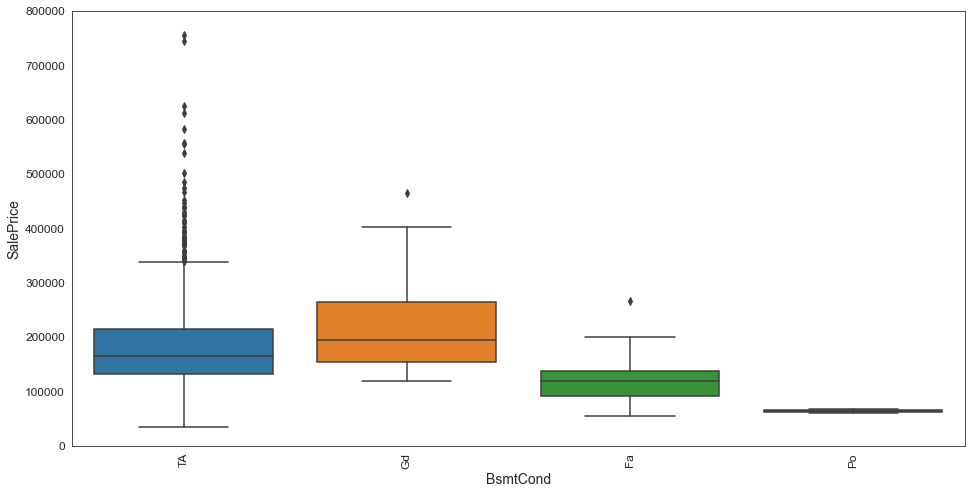

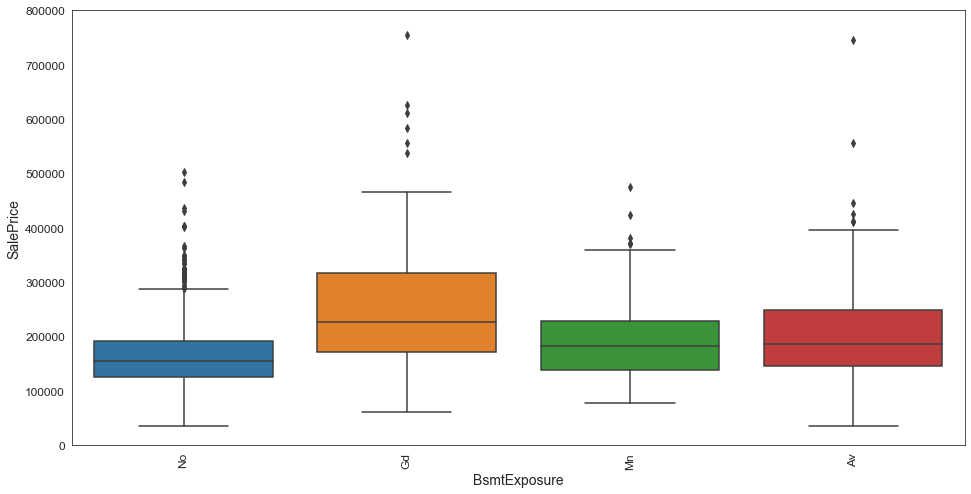

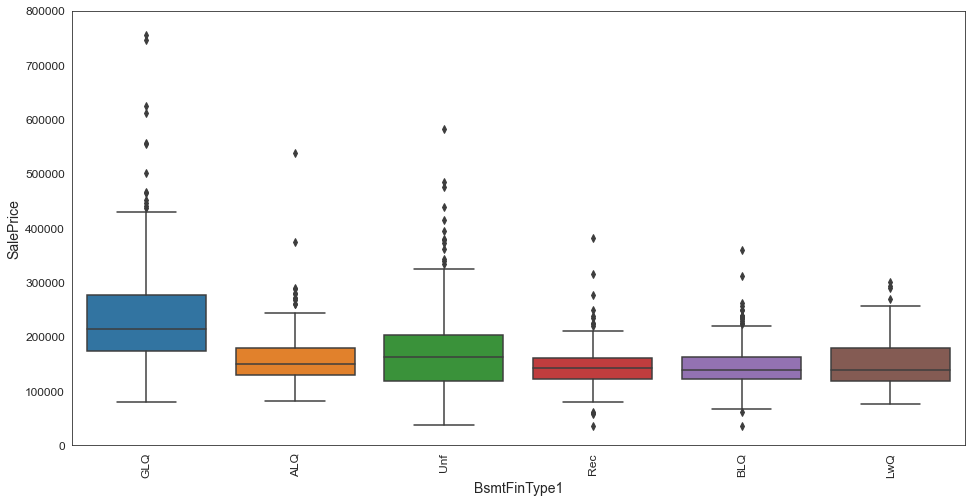

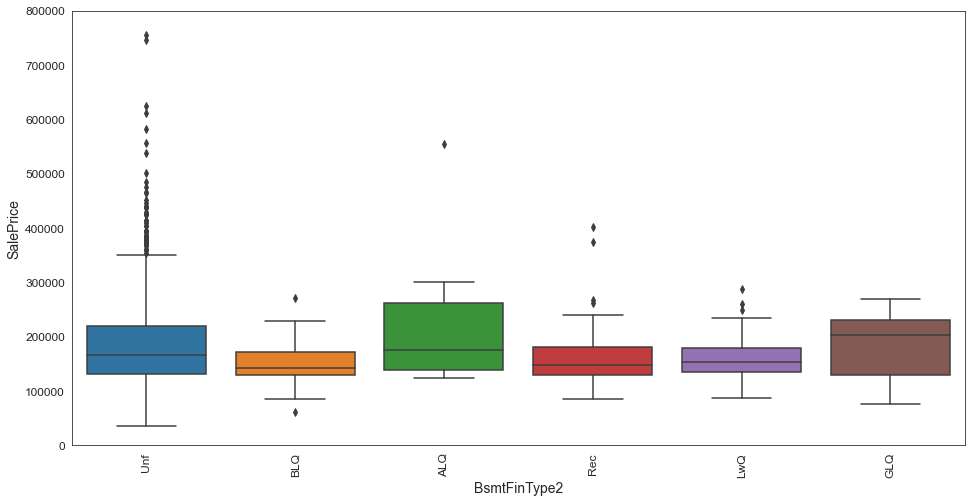

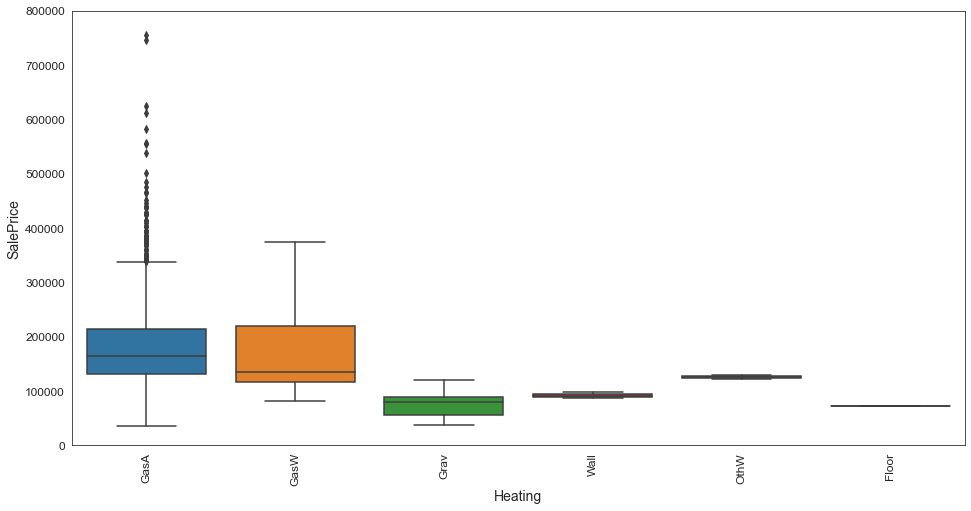

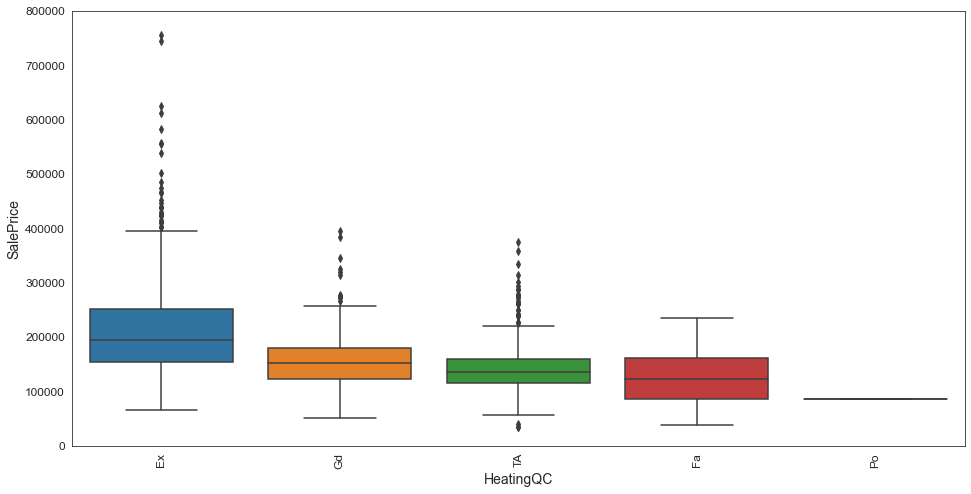

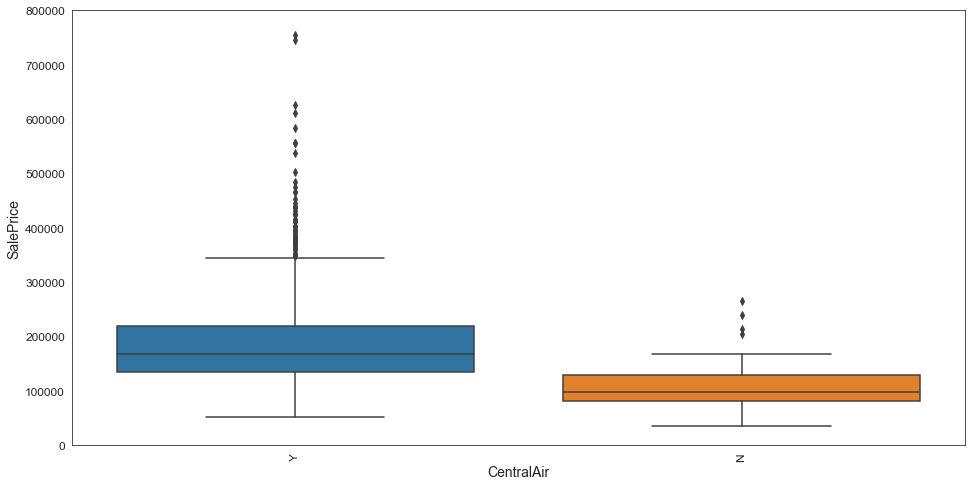

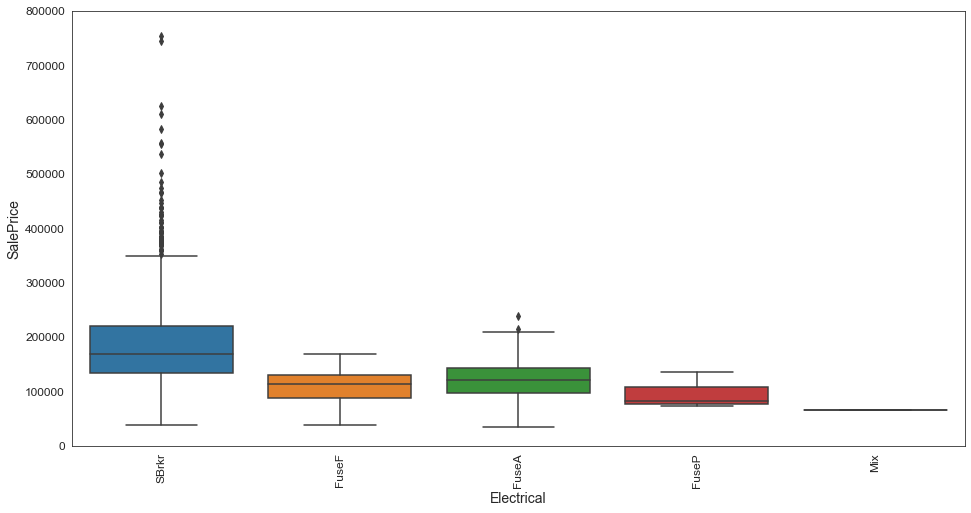

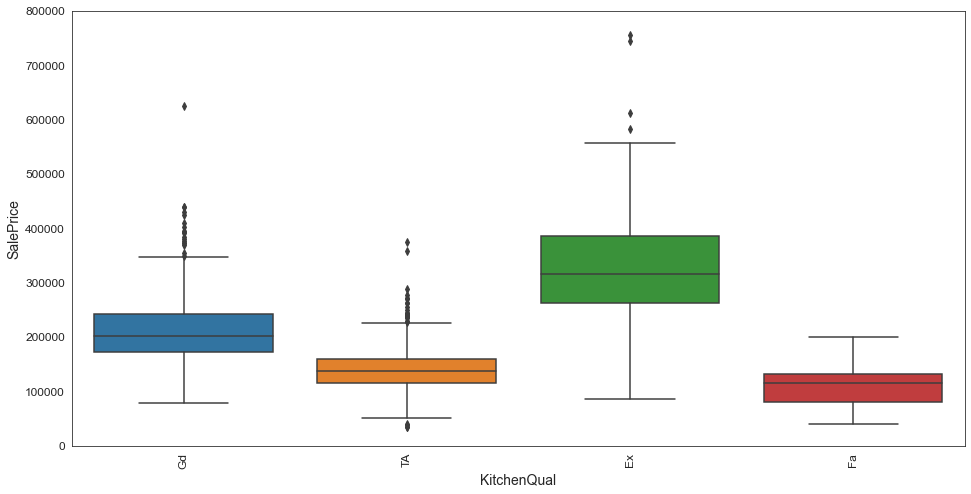

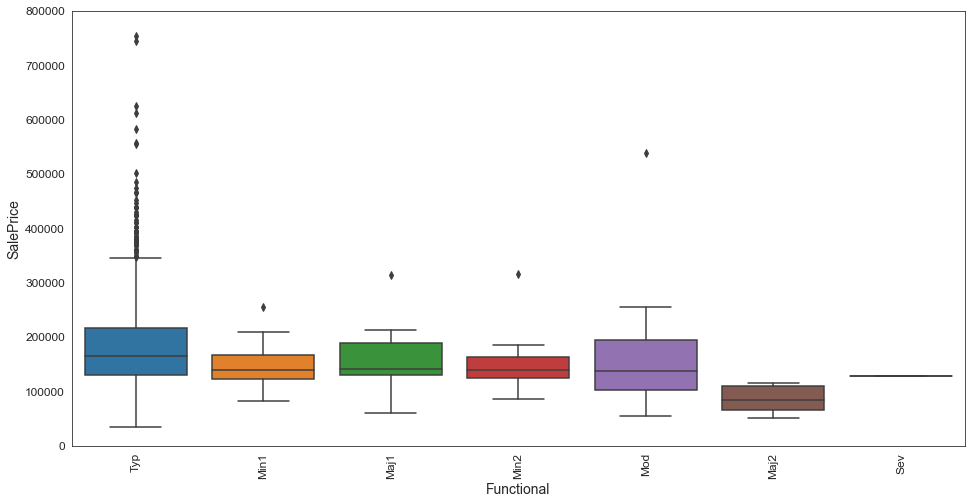

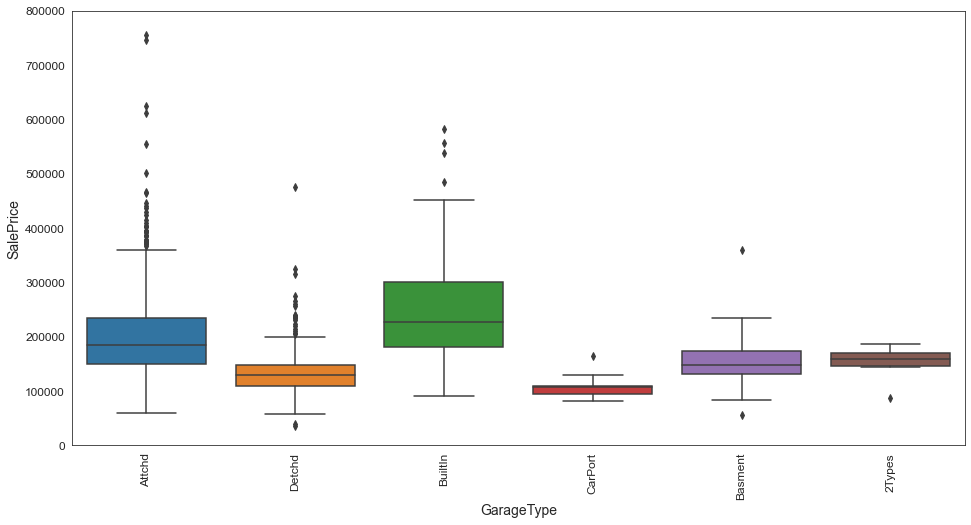

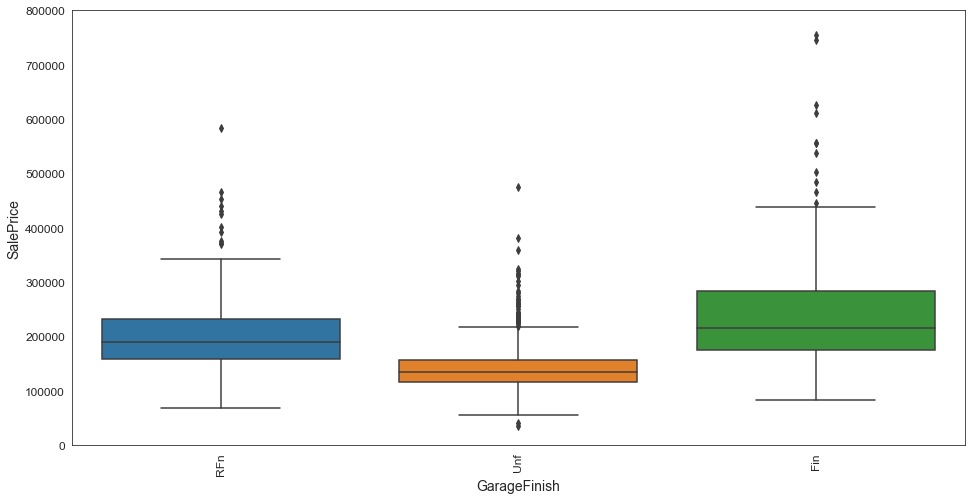

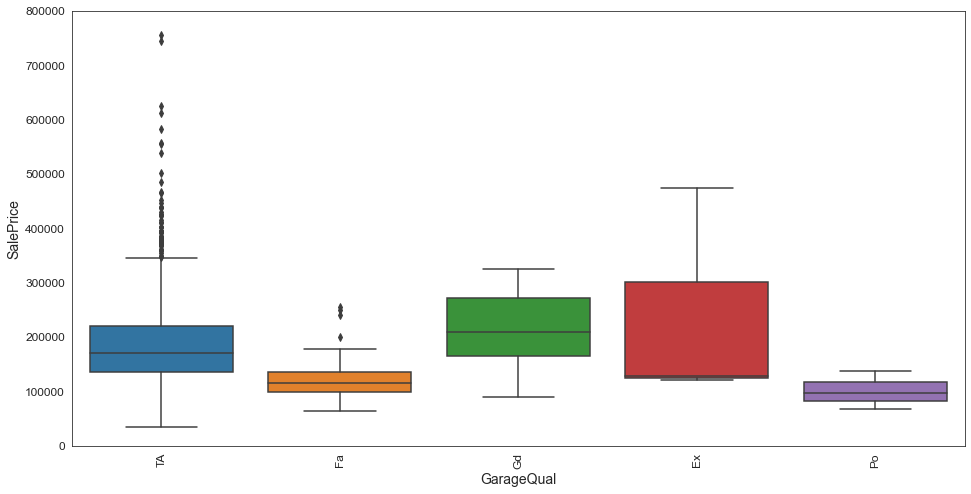

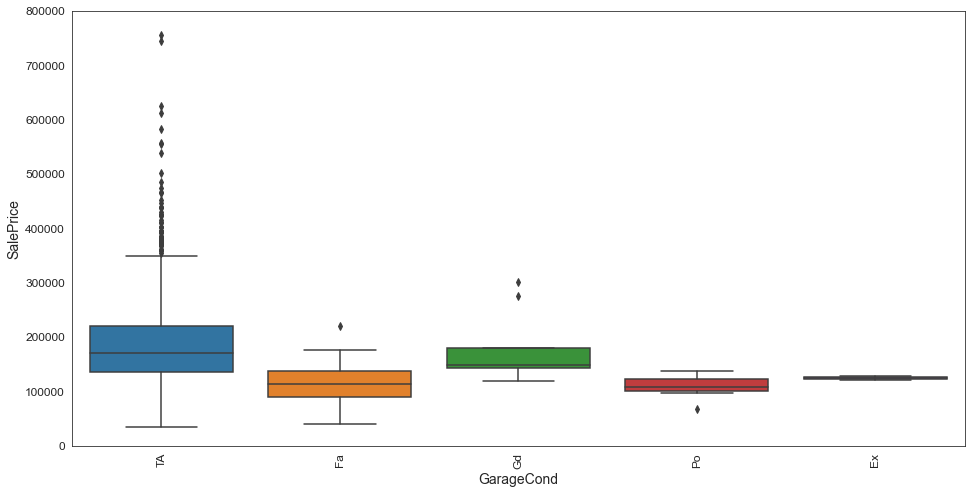

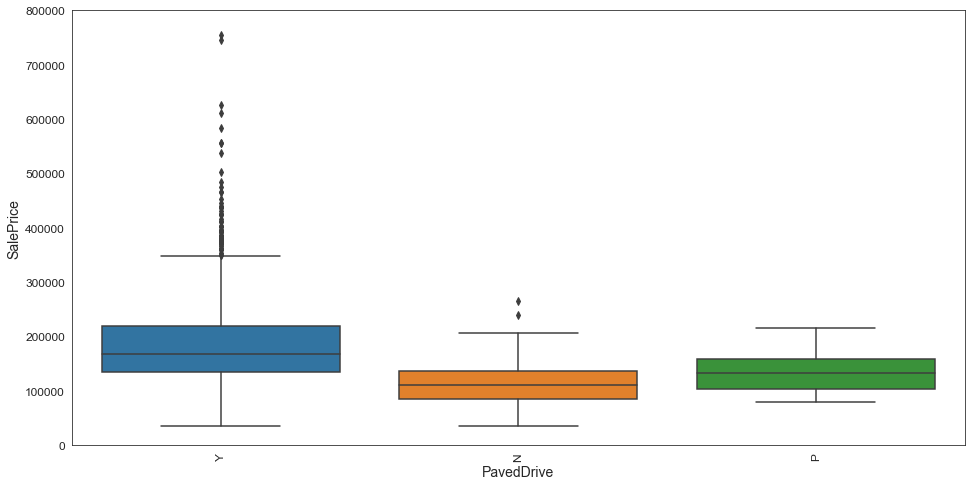

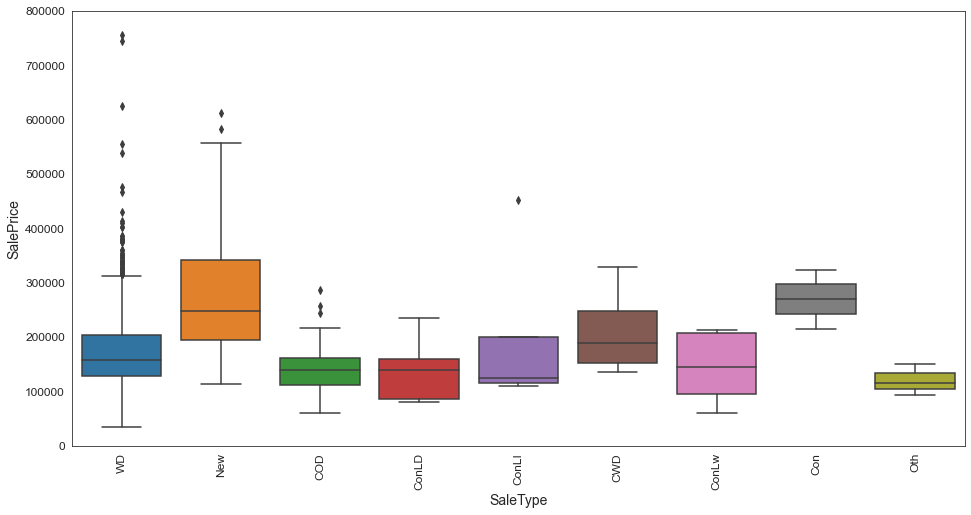

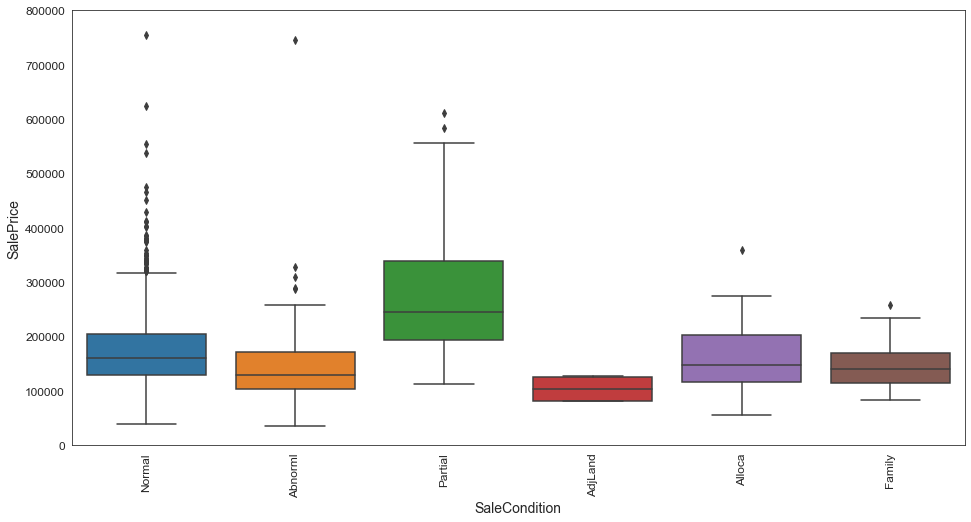

In [755]:
for i in list(df_not_num.columns):
    data = pd.concat([df_train['SalePrice'], df_train[i]], axis=1)
    f, ax = plt.subplots(figsize=(16, 8))
    fig = sns.boxplot(x=i, y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000);
    plt.xticks(rotation=90);

### Model Preparation

#### Understand Linear Regression assumptions
[A good article to read about it](https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/)


**1. Linearity**

This assumes that there is a linear relationship between the predictors (e.g. independent variables or features) and the response variable (e.g. dependent variable or label).

The most common way to assess linearity is to examine **scatter plots** and search for linear patterns.

How to fix it: Either adding polynomial terms to some of the predictors or applying nonlinear transformations .If those do not work, **try adding additional variables to help capture the relationship between the predictors and the label.**


**2. Normality of the Error Terms**

More specifically, this assumes that the error terms of the model are normally distributed.

How to fix it: It depends on the root cause, but there are a few options. Nonlinear transformations of the variables, excluding specific variables (such as long-tailed variables), or **removing outliers may solve this problem.**


**3. Homoscedasticity**

Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)'.

Heteroscedasticity can be solved either by using weighted least squares regression instead of the standard OLS or transforming either the dependent or highly skewed variables. **Performing a log transformation on the dependent variable is not a bad place to start**

**4. No Multicollinearity among Predictors**

This assumes that the predictors used in the regression are not correlated with each other.

we can use a heatmap of the correlation as a visual aid and examine the variance inflation factor (VIF) to detect the problem.

How to fix it: This can be fixed by other **removing predictors with a high variance inflation factor (VIF)** or performing dimensionality reduction.

**5. No Autocorrelation of the Error Terms**

This assumes no autocorrelation of the error terms. Autocorrelation being present typically indicates that we are missing some information that should be captured by the model.

How to fix it: A simple fix of adding lag variables can fix this problem. **Alternatively, interaction terms, additional variables, or additional transformations may fix this.**


#### Feature Engineering

- Target Variable

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


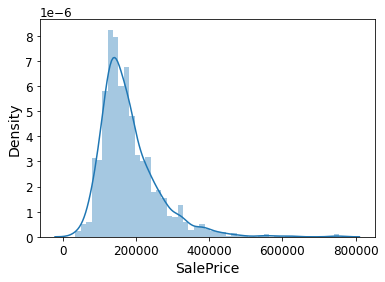

In [48]:
#histogram
sns.distplot(df_train['SalePrice']);

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

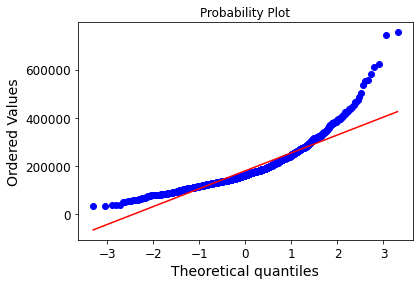

In [49]:
#normal probability plot
stats.probplot(df_train['SalePrice'], plot=plt)

The SalePrice is skewed to the right. This is a problem because most ML models don't do well with non-normally distributed data. We can apply a log tranform to fix the skew.

In [50]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

In [51]:
#check again
df_train['SalePrice']

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

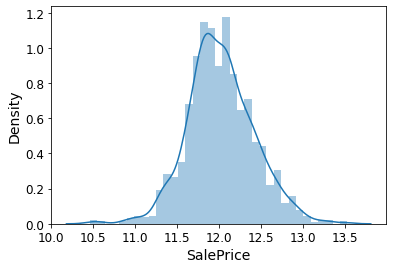

In [52]:
sns.distplot(df_train['SalePrice'])

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([10.46024211, 10.47194981, 10.54270639, ..., 13.34550693,
         13.5211395 , 13.53447303])),
 (0.3982622308161888, 12.024050901109383, 0.9953761475636613))

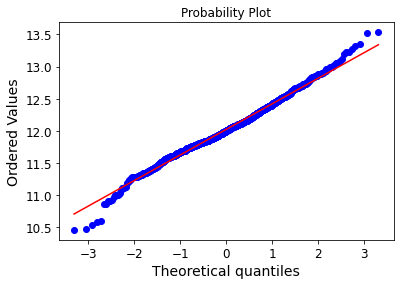

In [53]:
stats.probplot(df_train['SalePrice'],plot=plt)

- Handle Missing

In [54]:
#check missing again
re_missing = missing_values_table(df_train)
re_missing.sort_values(by='% of Total Values', ascending = False)

,Missing Values,% of Total Values
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945
GarageCond,81,5.547945
BsmtExposure,38,2.602740
BsmtFinType2,38,2.602740
BsmtQual,37,2.534247
BsmtCond,37,2.534247


In [55]:
# Some of the non-numeric predictors are stored as numbers; convert them into strings 
df_train['MSSubClass'] = df_train['MSSubClass'].apply(str)
df_train['YrSold'] = df_train['YrSold'].astype(str)
df_train['MoSold'] = df_train['MoSold'].astype(str)

In [56]:
def handle_missing(features):
    # the data description states that NA refers to typical ('Typ') values
    features['Functional'] = features['Functional'].fillna('Typ')
    # Replace the missing values in each of the columns below with their mode
    features['Electrical'] = features['Electrical'].fillna("SBrkr")
    features['KitchenQual'] = features['KitchenQual'].fillna("TA")
    features['Exterior1st'] = features['Exterior1st'].fillna(features['Exterior1st'].mode()[0])
    features['Exterior2nd'] = features['Exterior2nd'].fillna(features['Exterior2nd'].mode()[0])
    features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])
    features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
    
    # Replacing the missing values with 0, since no garage = no cars in garage
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        features[col] = features[col].fillna(0)
    # Replacing the missing values with None
    for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
        # put your code here:
        features[col] = features[col].fillna('None')
    # NaN values for these categorical basement features, means there's no basement
    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        # put your code here:
        for col in ('BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'):
            features[col] = features[col].fillna('None')
    # Group the by neighborhoods, and fill in missing value by the median LotFrontage of the neighborhood
    features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

    # We have no particular intuition around how to fill in the rest of the categorical features
    # So we replace their missing values with None
    objects = []
    for i in features.columns:
        if features[i].dtype == object:
            objects.append(i)
    features.update(features[objects].fillna('None'))
        
    # And we do the same thing for numerical features, but this time with 0s
    numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numeric = []
    for i in features.columns:
        if features[i].dtype in numeric_dtypes:
            numeric.append(i)
    features.update(features[numeric].fillna(0))    
    return features

df_train = handle_missing(df_train)

In [57]:
re_missing=missing_values_table(df_train)
re_missing.sort_values(by='% of Total Values', ascending=False)

,Missing Values,% of Total Values


In [60]:
type(df_train.dtypes[df_train.dtypes != 'object'])

pandas.core.series.Series

- Deal with Numerical Features

In [58]:
#get numerical feature list
# put your code here:

numeric_feats = df_train.dtypes[df_train.dtypes != 'object'].index[:-1]
numeric_feats

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

**Remove highly correlated features**

In [766]:
corr = df_train[numeric_feats].corr()
df_corr = pd.DataFrame(corr)
temp_lst = []

for i in df_corr.index:
    for c in df_corr.columns:
        if c == i:
            continue
        else:
            if df_corr.loc[i,c] >= 0.6:
                if [i,c] not in temp_lst and [c,i] not in temp_lst:
                    temp_lst.append([i,c])
                    print("{0} and {1}: {2}".format(i,c,df_corr.loc[i,c]))

OverallQual and GarageCars: 0.6006707165907189
BsmtFinSF1 and BsmtFullBath: 0.6492117535742737
TotalBsmtSF and 1stFlrSF: 0.8195299750050355
2ndFlrSF and GrLivArea: 0.6875010641666008
2ndFlrSF and HalfBath: 0.6097073002717444
2ndFlrSF and TotRmsAbvGrd: 0.6164226354915353
GrLivArea and FullBath: 0.6300116462511144
GrLivArea and TotRmsAbvGrd: 0.8254893743088377
BedroomAbvGr and TotRmsAbvGrd: 0.6766199357426479
GarageCars and GarageArea: 0.8824754142814603


In [76]:
# Remove highly correlated columns with business judgement
cols_corr=['1stFlrSF', 'TotRmsAbvGrd', 'GarageCars', 'BsmtFinSF1','2ndFlrSF', 'FullBath', 'TotRmsAbvGrd']
# put your code here:

df_train.drop(columns = cols_corr,inplace = True)
# redefine numerical variable list
numeric_feats = df_train.dtypes[df_train.dtypes != "object"].index[:-1] # remove target variable

KeyError: "['1stFlrSF' 'TotRmsAbvGrd' 'GarageCars' 'BsmtFinSF1' '2ndFlrSF' 'FullBath'\n 'TotRmsAbvGrd'] not found in axis"

In [77]:
numeric_feats

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'],
      dtype='object')

In [78]:
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.231877,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,-0.288653,-0.944591,-0.459303,...,0,0,0,1,0,0,0,0,1,0
1,0.437043,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,-0.288653,-0.641228,0.466465,...,0,0,0,1,0,0,0,0,1,0
2,-0.098093,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,-0.288653,-0.301643,-0.313369,...,0,0,0,1,0,0,0,0,1,0
3,-0.454850,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.288653,-0.061670,-0.687324,...,0,0,0,1,1,0,0,0,0,0
4,0.615421,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,-0.288653,-0.174865,0.199680,...,0,0,0,1,0,0,0,0,1,0


**Feature scaling**
   
Most Machine Learning algorithms don't performan well when the input numerical attributes have very different scales.

There are 2 common ways to get all attributes to have the same scale: min-max scaling and standardization

- **Standardization** is to standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

- **Min-max** is to rescales the data set such that all feature values are in the range [0, 1]:

The transformation is given by:

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

In [79]:
from sklearn.preprocessing import StandardScaler
numeric_feats = df_train.dtypes[df_train.dtypes != "object"].index
# define standard scaler
scaler = StandardScaler()
# transform data

df_train[numeric_feats] = scaler.fit_transform(df_train[numeric_feats])
# put your code here:

In [65]:
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,-0.231877,-0.207142,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2,2008,WD,Normal,0.560068
1,20,RL,0.437043,-0.091886,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,5,2007,WD,Normal,0.212764
2,60,RL,-0.098093,0.073480,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,9,2008,WD,Normal,0.734046
3,70,RL,-0.454850,-0.096897,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,2,2006,WD,Abnorml,-0.437382
4,60,RL,0.615421,0.375148,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,12,2008,WD,Normal,1.014651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,-0.365661,-0.260560,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,8,2007,WD,Normal,0.121434
1456,20,RL,0.660016,0.266407,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2,2010,WD,Normal,0.578020
1457,70,RL,-0.187282,-0.147810,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,5,2010,WD,Normal,1.174708
1458,20,RL,-0.098093,-0.080160,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,4,2010,WD,Normal,-0.399656


- Deal with Categorical Features

Most machine learning models unfortunately cannot deal with categorical variables

There are two mains to encode categorical variables:

1. **Label encoding**: assign each unique category 
   in a categorical variable with an integer. 
   
   No new columns are created.

2. **One-hot encoding**: create a new column for each unique category in a categorical variable. 

    Each observation recieves a 1 in the column for its corresponding category and a 0 in all other new columns.

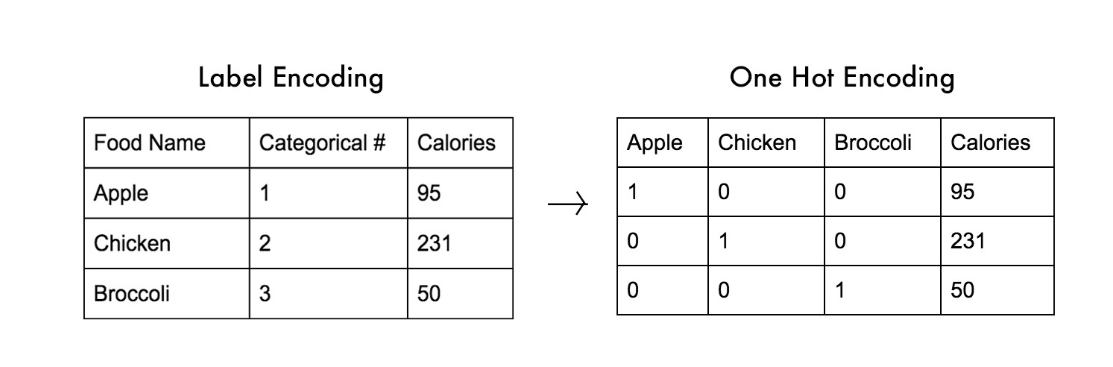

`两种编码方式的优缺点:`

- Label encoding
    - 优点：使用方便简单，不会创建新的变量，也可以自由定义数字。
    - 缺点：可解释性比较差，还会产生排序问题。因此，Label encoding编码其实并没有很多的应用场景。


- One-hot encoding
    - 优点：容易理解，解决了Label encoding的排序问题，在一定程度上也起到了扩充特征的作用。
    - 缺点：当类别的数量很多时，会创建过多变量，影响模型效果，而且导致运算速度过慢。

Define a one-hot encoding function:
  - 使用pandas.get_dummies(data, columns=None,dummy_na=False...)将字符型变量转化成哑变量(dummy variables)/指示列
    - 参数data代表想要转化的数据
    - 参数columns代表数据中想要进行转化的字符型变量
    - dummy_na=True代表对缺失值也添加一个指示列

In [80]:
# put your code here:
df_train = pd.get_dummies(df_train)

In [81]:
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.231877,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,-0.288653,-0.944591,-0.459303,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,0.437043,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,-0.288653,-0.641228,0.466465,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,-0.098093,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,-0.288653,-0.301643,-0.313369,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,-0.454850,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.288653,-0.061670,-0.687324,...,-0.058621,-0.301962,-0.045376,0.390293,3.668167,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,0.615421,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,-0.288653,-0.174865,0.199680,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [82]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 303 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(303)
memory usage: 3.4 MB


In [83]:
df_num_corr = df_train.corr()['SalePrice'] # -1 because the latest row is SalePrice
top_corr_features = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(top_corr_features), top_corr_features))





There is 11 strongly correlated values with SalePrice:
SalePrice           1.000000
OverallQual         0.817184
GrLivArea           0.700927
GarageArea          0.650888
TotalBsmtSF         0.612134
YearBuilt           0.586570
YearRemodAdd        0.565608
Foundation_PConc    0.530840
ExterQual_Gd        0.509675
KitchenQual_TA     -0.538237
ExterQual_TA       -0.595881
Name: SalePrice, dtype: float64


### Train models

**Define x and y**

In [84]:
# put your code here:
housing_prepared = df_train.drop(columns = 'SalePrice')
housing_labels = df_train['SalePrice']

**Try linear regression first**

In [85]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

**Evaluate the model**

In [86]:
from sklearn.metrics import mean_squared_error
#predit
housing_predictions = lin_reg.predict(housing_prepared)
#evaluate
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.23571720810046584

In [87]:
#use another way to evaluate the performance. for example, if there are many outliers, we should also consider using the MAE
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

0.16257336174516002

**Try RandomForest**

In [88]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [90]:
# put your code here:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels,housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse


0.13750594209764688

In [91]:
forest_mae = mean_absolute_error(housing_labels,housing_predictions)
forest_mae

0.09174965138523344

We need to further validate this model before we can submit